In [1]:
import cv2 
import matplotlib.pyplot as plt 

# Local histogram equalisation

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

(512, 512)


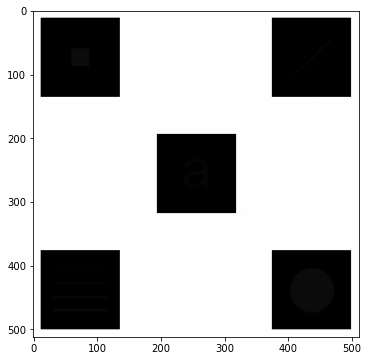

In [3]:
img_path = "../images/Fig0326(a)(embedded_square_noisy_512).tif"

im = cv2.imread(img_path)

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

print(gray.shape)

plt.imshow(gray, cmap="gray")

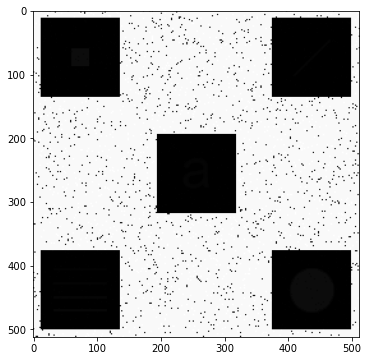

In [11]:
hist_eq = cv2.equalizeHist(gray)

plt.imshow(hist_eq, cmap="gray")

## Implementing local histogram equalisation

Instead of running the histogram equalisation on the whole image, divide the image into tiles, and run the histogram equalisation for each tile 

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_histogram_equalization(img, tile_size=5):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    
    h, w = img.shape
    img_equalized = np.zeros_like(img)
    
    step_h = max(h // tile_size, 1)  # Avoid zero step
    step_w = max(w // tile_size, 1)

    # Create a copy of the image for visualization
    im_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for i in range(0, h, step_h):
        for j in range(0, w, step_w):
            # Extract the local tile
            tile = img[i:i+step_h, j:j+step_w]

            # Apply histogram equalization
            img_equalized[i:i+step_h, j:j+step_w] = cv2.equalizeHist(tile)

    return img_equalized

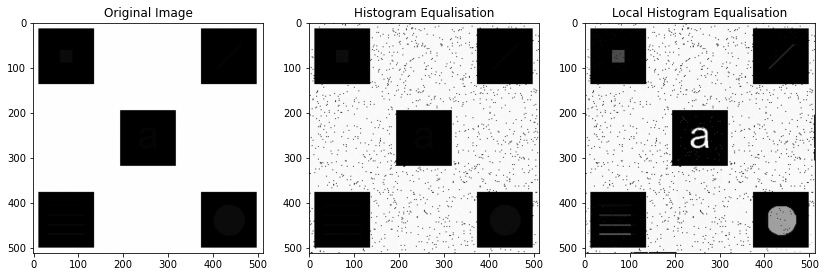

In [20]:
local_hist_eq = local_histogram_equalization(gray)

# compare the output 

plt.figure(figsize = (14,8))
plt.subplot(131); plt.title("Original Image")
plt.imshow(gray, cmap="gray")

plt.subplot(132); plt.title("Histogram Equalisation")
plt.imshow(hist_eq, cmap="gray")

plt.subplot(133); plt.title("Local Histogram Equalisation")
plt.imshow(local_hist_eq, cmap="gray")

# Let's see what's happening in more detail


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_histogram_equalization(img, tile_size=5):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    
    h, w = img.shape
    img_equalized = np.zeros_like(img)
    
    step_h = max(h // tile_size, 1)  # Avoid zero step
    step_w = max(w // tile_size, 1)

    # Create a copy of the image for visualization
    im_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for i in range(0, h, step_h):
        for j in range(0, w, step_w):
            # Extract the local tile
            tile = img[i:i+step_h, j:j+step_w]

            # Apply histogram equalization
            img_equalized[i:i+step_h, j:j+step_w] = cv2.equalizeHist(tile)

            # Draw a rectangle around the tile
            cv2.rectangle(im_copy, (j, i), (j + step_w, i + step_h), (0, 0, 255), 1)

            # Show the visualization
            plt.imshow(im_copy[:, :, ::-1])  # Convert BGR to RGB for matplotlib
            plt.show()
            
            # Show histograms before and after equalization
            plt.figure(figsize=(10, 4))
            plt.subplot(121); plt.hist(np.ravel(tile), bins=256, range=[0,256]); plt.title("Before Equalization")
            plt.subplot(122); plt.hist(np.ravel(img_equalized[i:i+step_h, j:j+step_w]), bins=256, range=[0,256]); plt.title("After Equalization")
            plt.show()

    return img_equalized

# # Example usage:
# img = cv2.imread("input.jpg", cv2.IMREAD_GRAYSCALE)
# equalized_img = local_histogram_equalization(img, tile_size=5)
# cv2.imshow("Local Histogram Equalization", equalized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


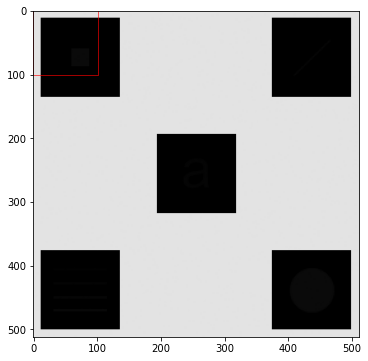

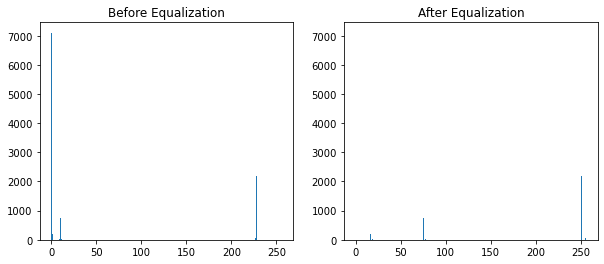

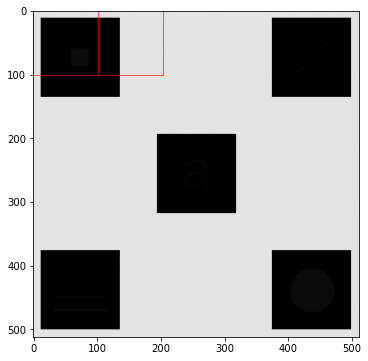

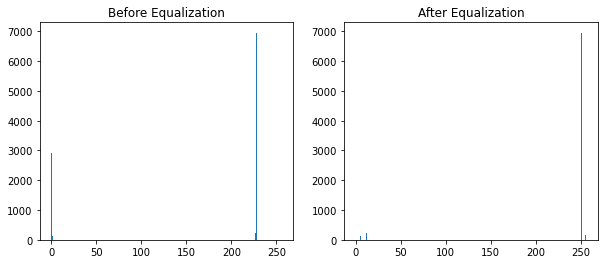

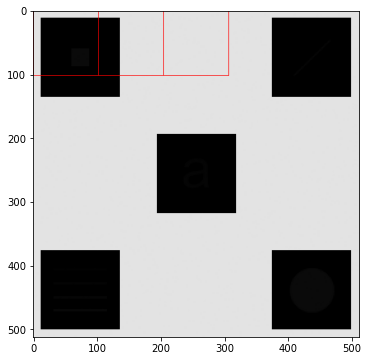

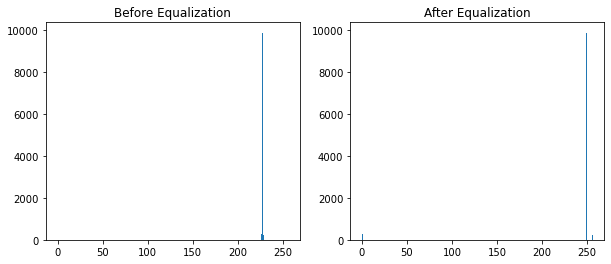

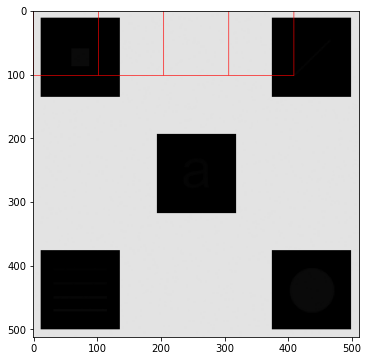

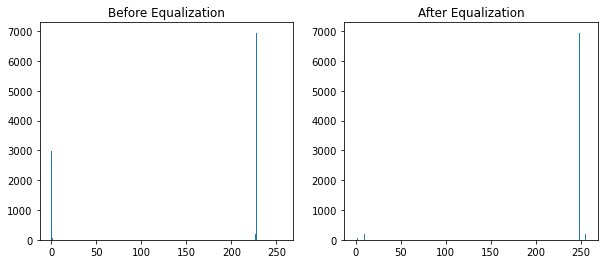

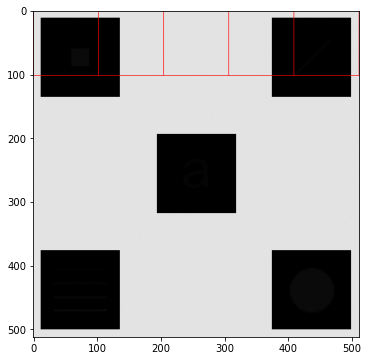

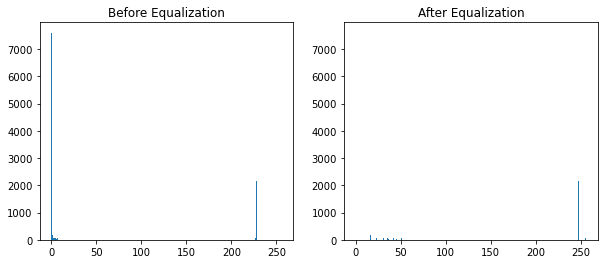

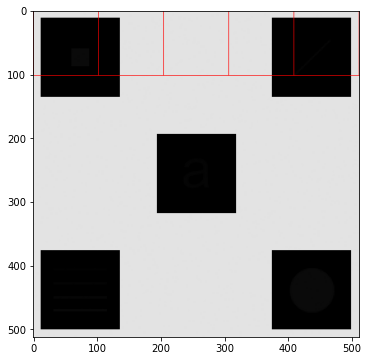

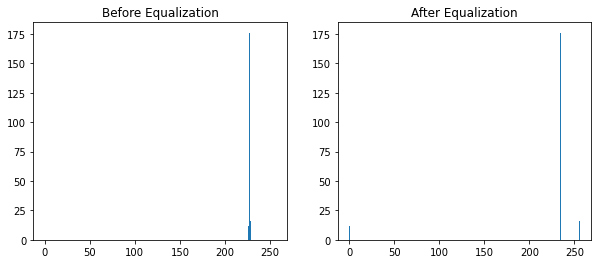

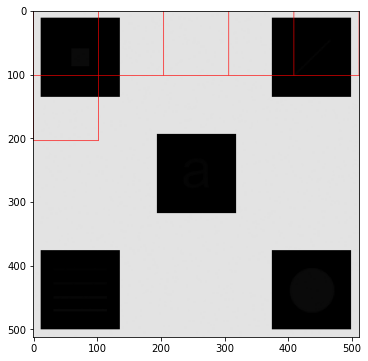

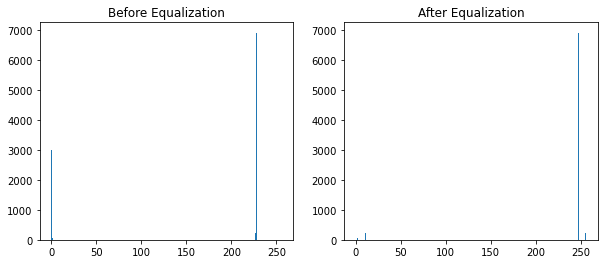

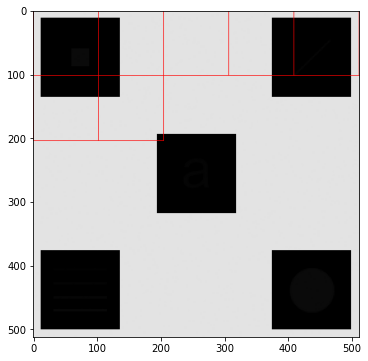

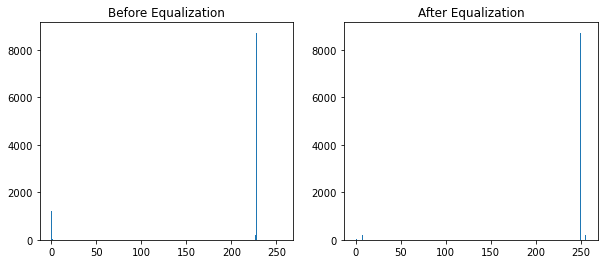

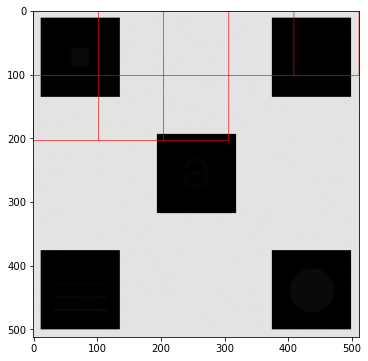

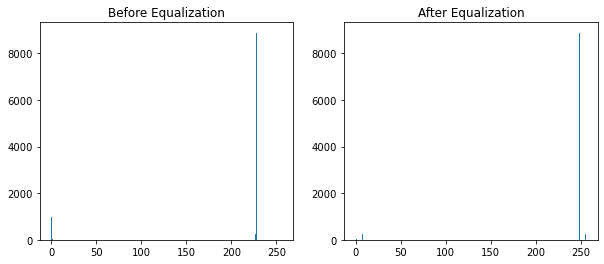

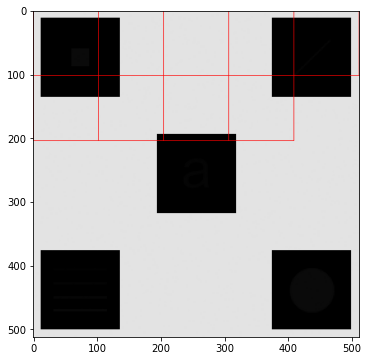

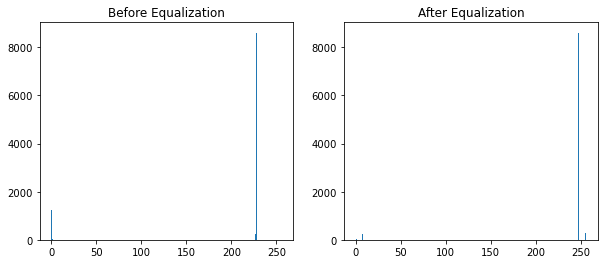

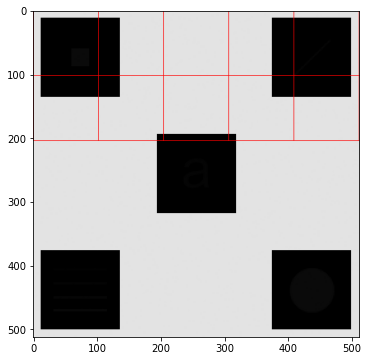

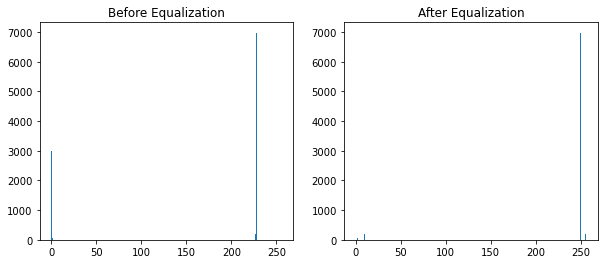

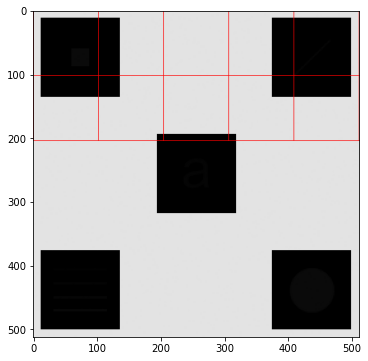

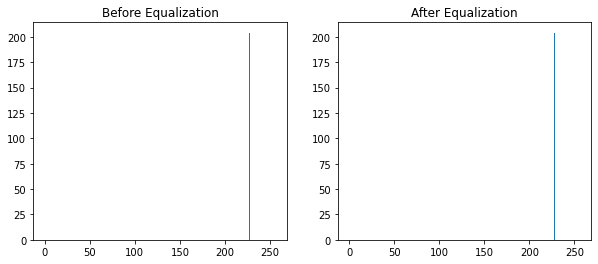

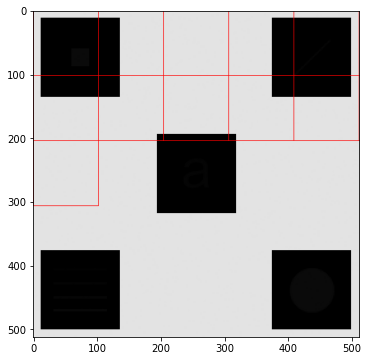

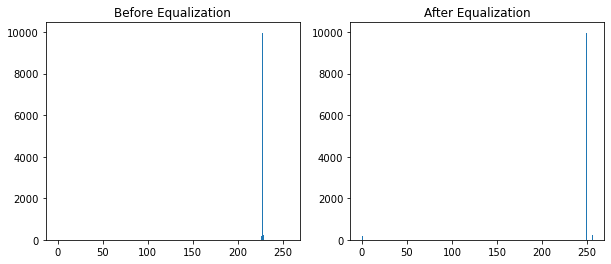

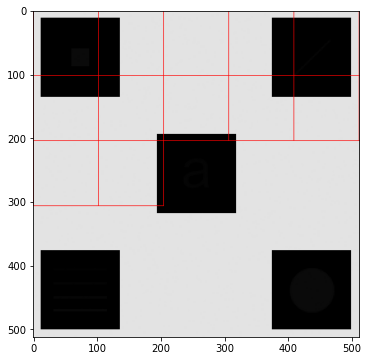

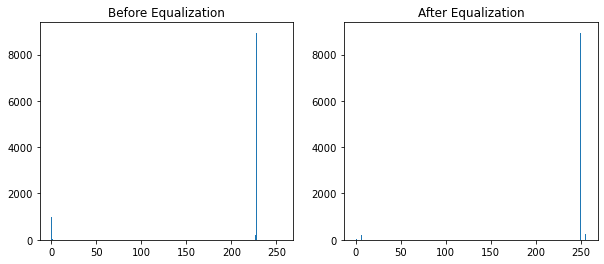

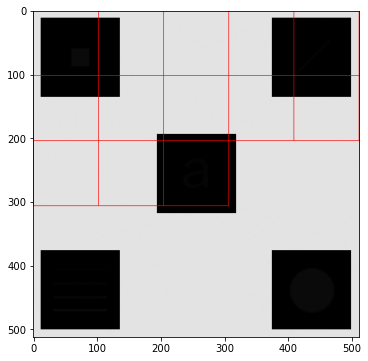

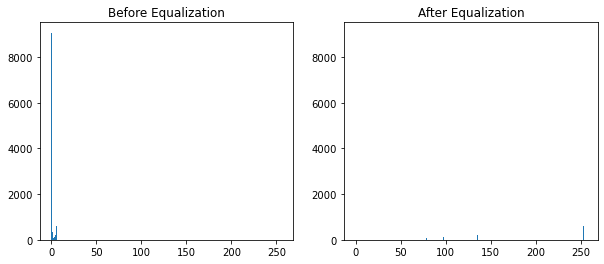

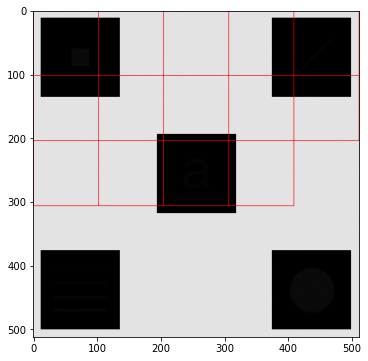

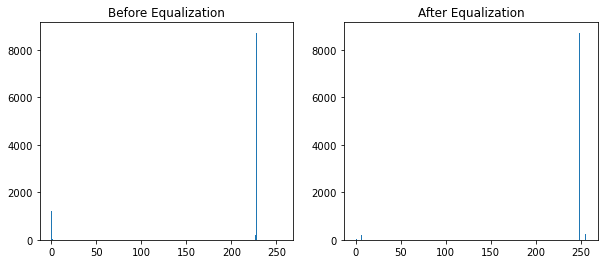

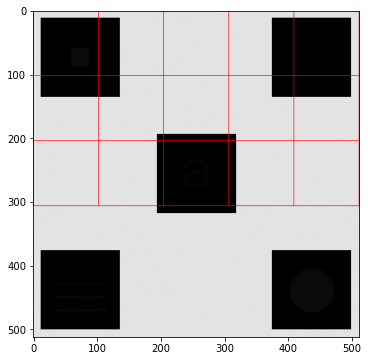

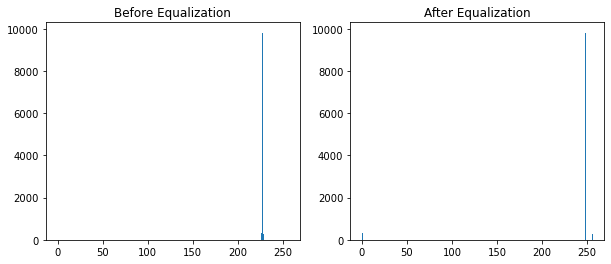

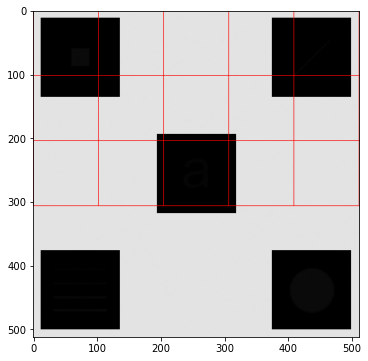

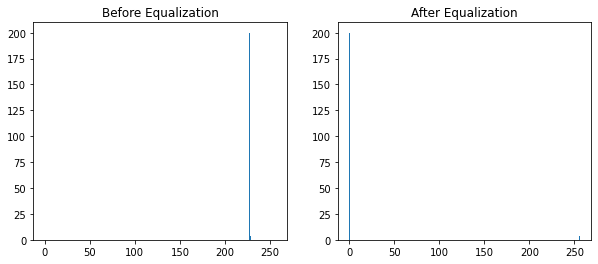

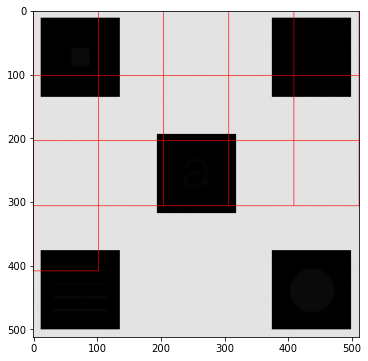

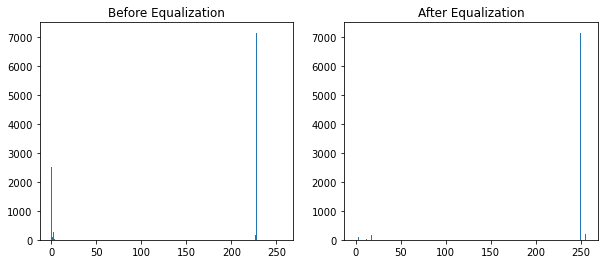

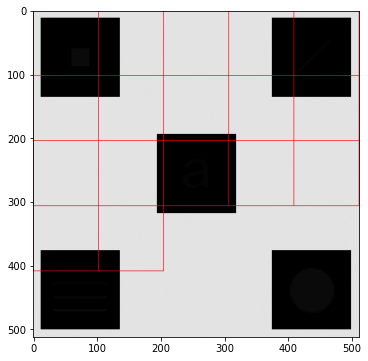

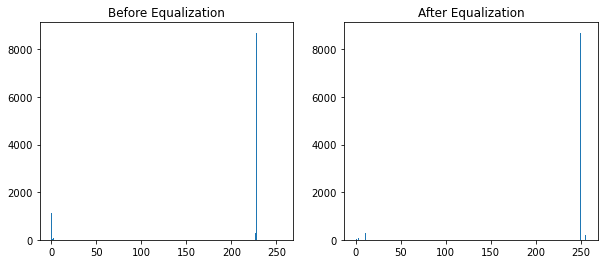

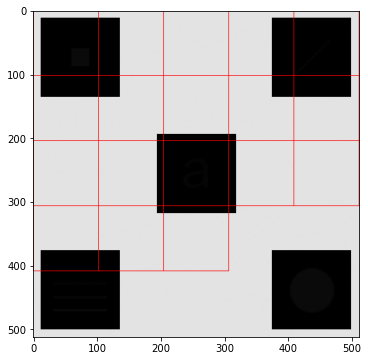

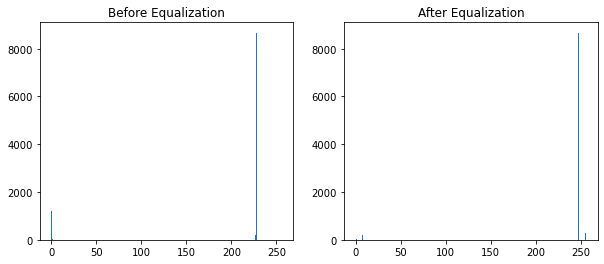

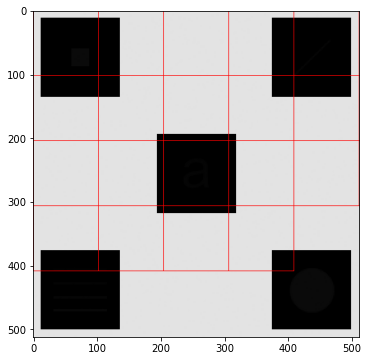

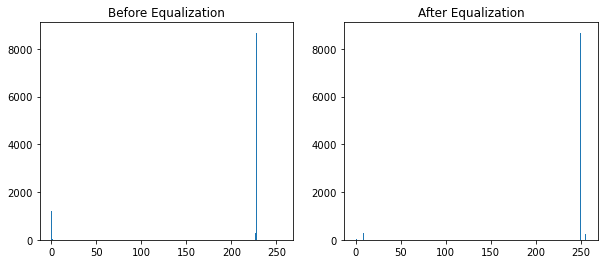

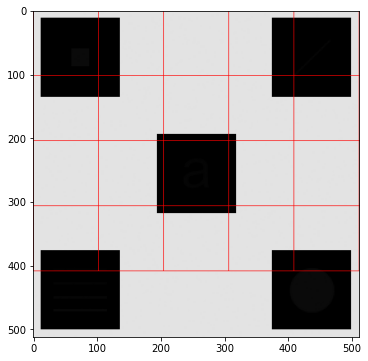

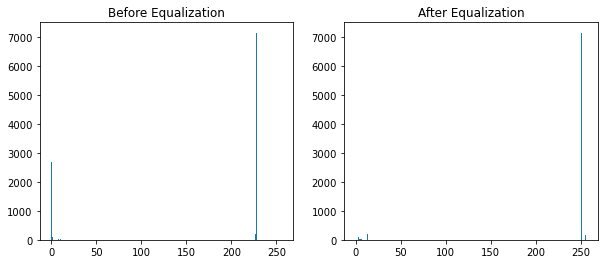

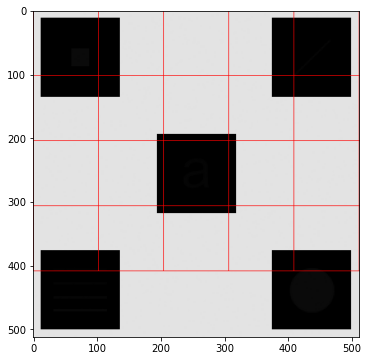

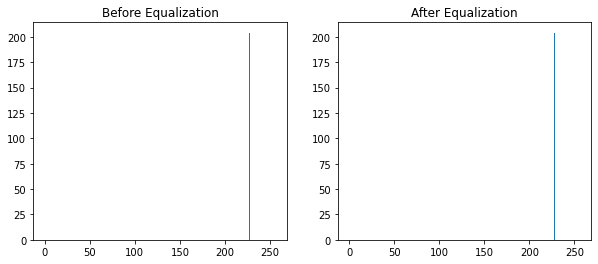

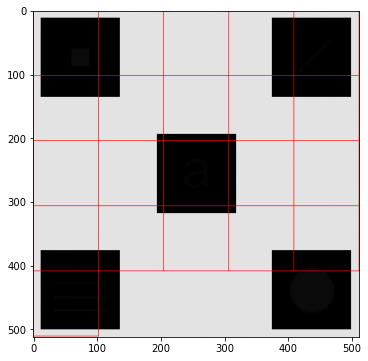

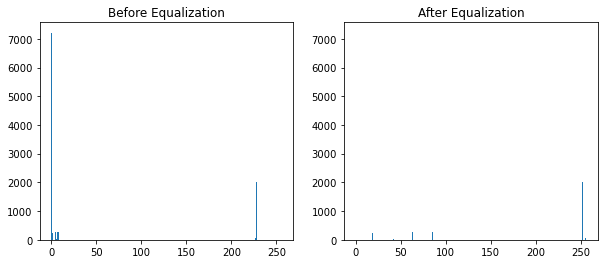

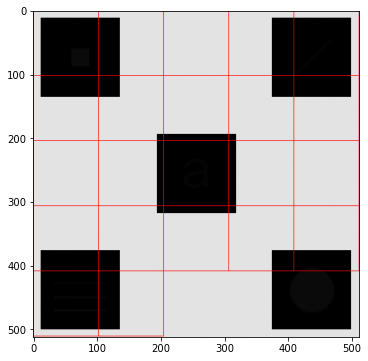

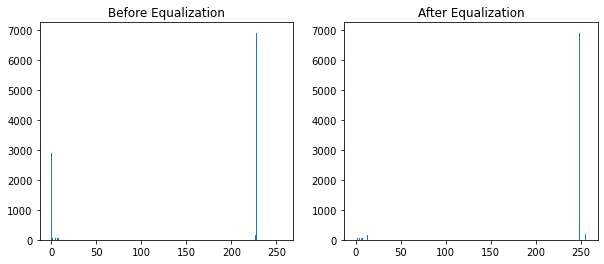

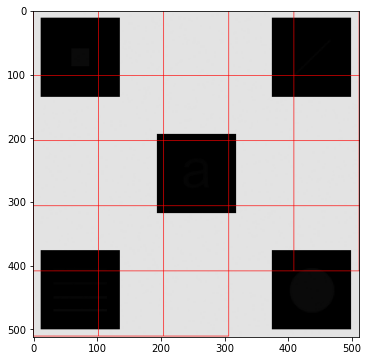

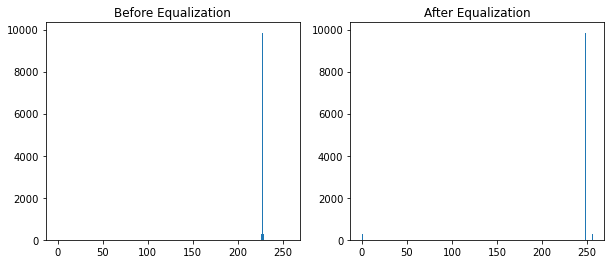

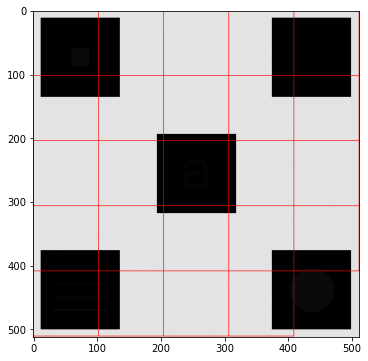

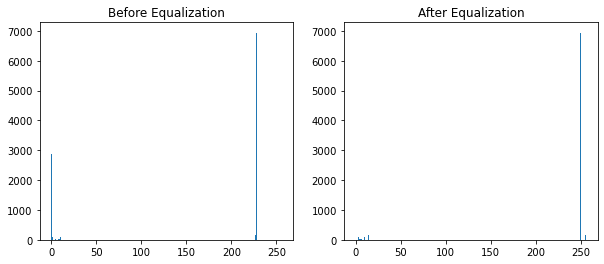

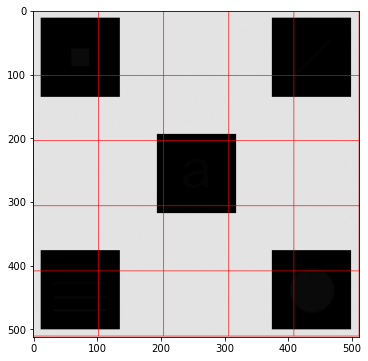

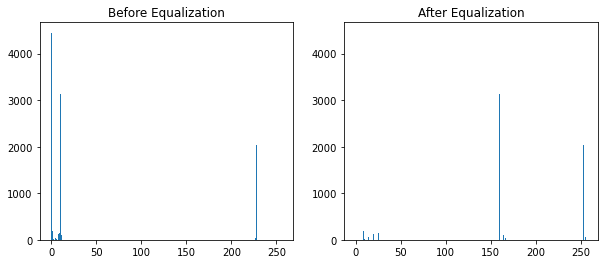

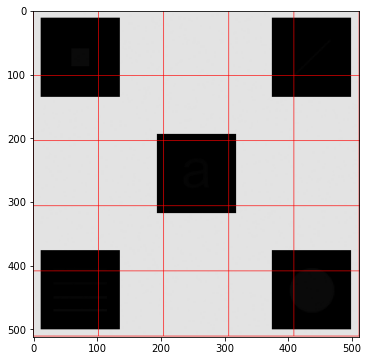

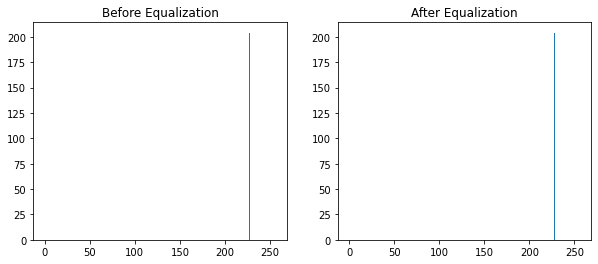

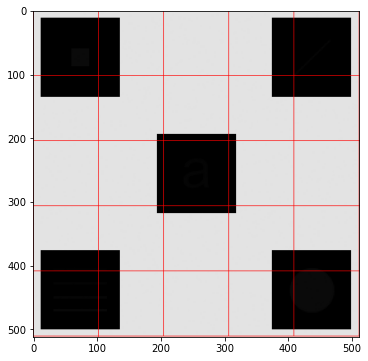

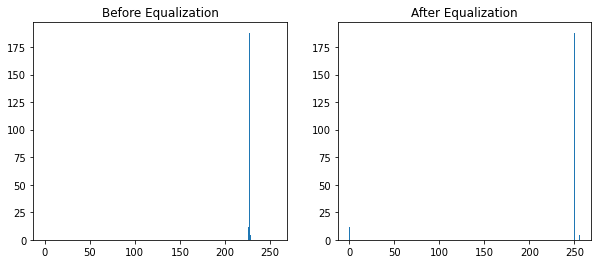

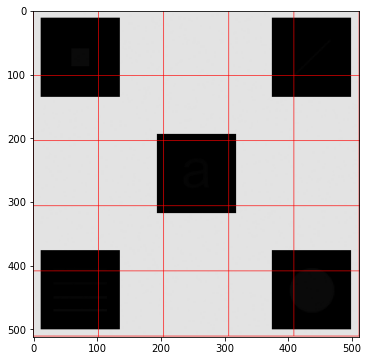

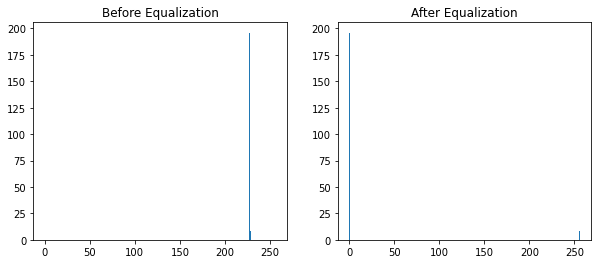

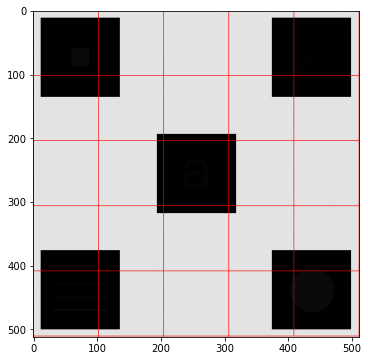

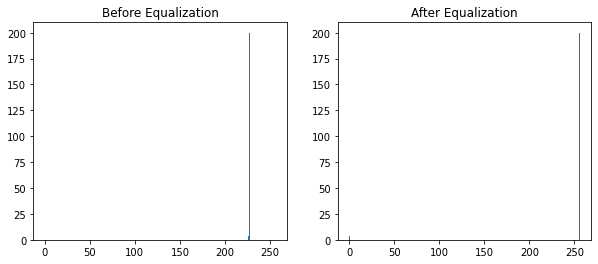

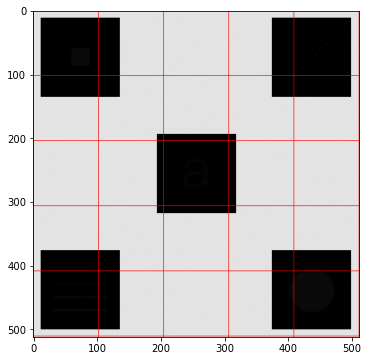

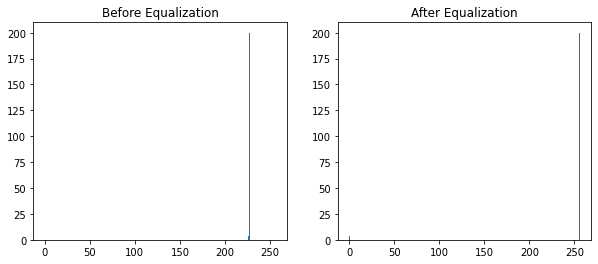

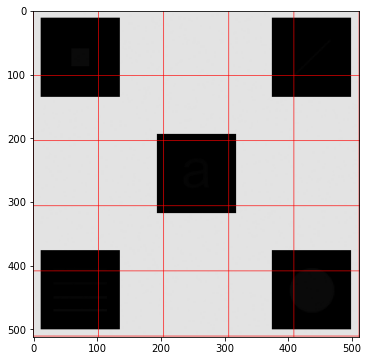

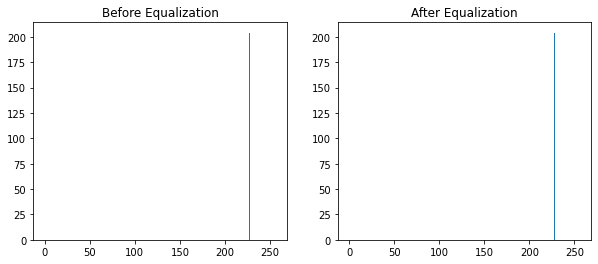

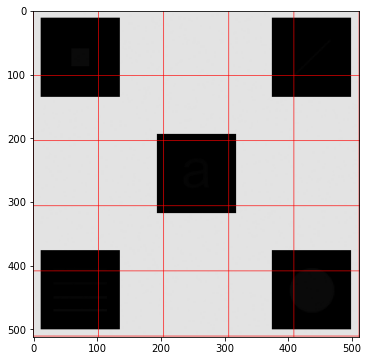

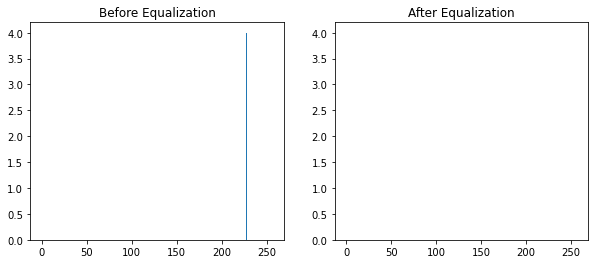

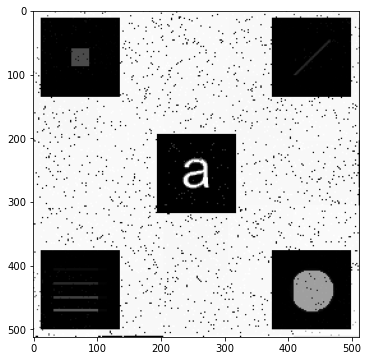

In [22]:
local_hist_img = local_histogram_equalization(gray)

plt.imshow(local_hist_img, cmap="gray")

Focus on the area where the histogram equalisation is being applied on the black region. We can see that in the initial histogram, the pixels were close to 0. In the equlised case, these pixels were having values more in the middle region, and hence, they can be differentiated now from the dark background. 